In [20]:
import pandas as pd
df = pd.read_csv("data/embeddings_ver2.csv")
df


,question,answer,tag,processed_question,vector_embeddings
0,Nguyên tắc xét tuyển của học viện năm nay ntn?...,I. Xét tuyển dựa vào kết quả thi THPT 2024:\n-...,tuyển sinh,nguyên_tắc xét_tuyển của học_viện năm nay ntn ...,"[[0.15568478405475616, 0.21654900908470154, -0..."
1,Câu hỏi thường gặp về tuyển sinh,Bạn đang gặp vấn đề gì?,tuyển sinh,câu hỏi thường gặp về tuyển_sinh,"[[0.14806188642978668, 0.25333741307258606, -0..."
2,Chương trình đào tạo tại miền Nam có khác với ...,Chương trình đào tạo của Học viện được áp dụng...,tuyển sinh,chương_trình đào_tạo tại miền nam có khác với ...,"[[0.16127538681030273, 0.07369768619537354, -0..."
3,"Trường mình có 2 cơ sở, vậy sẽ phân bố học sin...",Chỉ tiêu đào tạo của từng cơ sở đã được Học vi...,tuyển sinh,trường mình có 2 cơ_sở vậy sẽ phân_bố học_sinh...,"[[0.061912957578897476, 0.1642293781042099, -0..."
4,"Em đăng ký NV1 là ngành An toàn thông tin, NV2...",Không được em nhé! Theo nguyên tắc xét tuyển t...,tuyển sinh,em đăng_ký nv1 là ngành an_toàn thông_tin nv2 ...,"[[0.08890154212713242, 0.04143541306257248, -0..."
...,...,...,...,...,...
1353,Thời gian bắt đầu kỳ học mới là khi nào?,Lớp học chính thường mở vào giữa tháng 8 hàng ...,học viện,thời_gian bắt_đầu kỳ_học mới là khi nào,"[[0.16444990038871765, 0.1728304922580719, -0...."
1354,Có tư vấn hướng nghiệp cho sinh viên không?,Học viện có trung tâm tư vấn hướng nghiệp cho ...,học viện,có tư_vấn hướng_nghiệp cho sinh_viên không,"[[0.289970338344574, 0.07325156033039093, 0.06..."
1355,Các giảng viên có trình độ như thế nào?,Các giảng viên đều có trình độ thạc sĩ trở lên...,học viện,các giảng_viên có trình_độ như_thế_nào,"[[0.15505947172641754, 0.25095638632774353, -0..."
1356,Có hỗ trợ tìm việc làm cho sinh viên sau khi t...,Học viện hỗ trợ tìm việc làm cho sinh viên thô...,học viện,có hỗ_trợ tìm việc_làm cho sinh_viên sau khi t...,"[[0.22574098408222198, 0.1800379753112793, 0.0..."


In [21]:
print(df['tag'].unique())


['tuyển sinh' 'học bổng' 'ngành đào tạo' 'học phí' 'điểm' 'học viện'
 'chào hỏi' 'địa chỉ']


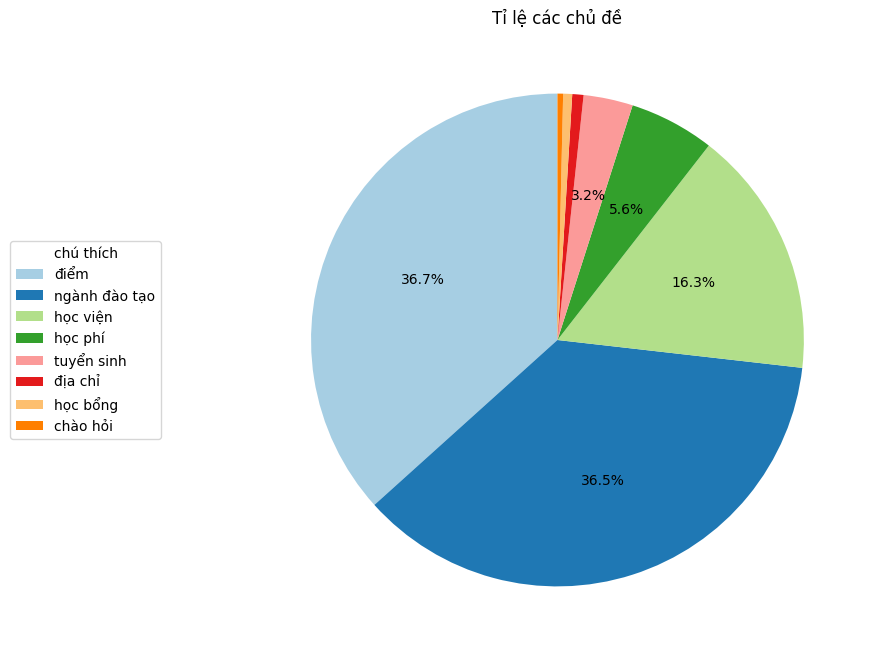

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def func(pct, allvals):
    if pct > 3:  
        return f"{pct:.1f}%"
    else:
        return ""  
value_counts = df['tag'].value_counts(dropna=False)

labels = value_counts.index.to_list()  
sizes = value_counts.values  
colors = plt.cm.Paired.colors
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, 
    autopct=lambda pct: func(pct, sizes),
    startangle=90, 
    colors=colors,
    textprops={'fontsize': 10}
)

plt.legend(
    wedges, 
    labels, 
    title="chú thích", 
    loc="center left", 
    bbox_to_anchor=(-0.4, 0.5),  
    fontsize=10
)

plt.title("Tỉ lệ các chủ đề")
plt.show()

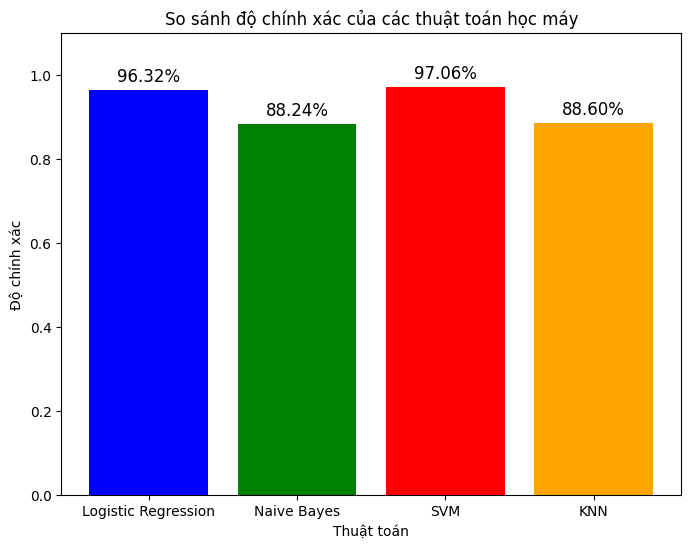

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Dữ liệu mẫu
queries = df['question']
labels = df['tag']

# Vector hóa string thành TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(queries)

# Chia dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Khai báo các mô hình học máy
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Tính độ chính xác cho từng mô hình
accuracies = []
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Vẽ biểu đồ so sánh độ chính xác
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các thuật toán học máy')
plt.ylim([0, 1.1])  # Giới hạn độ chính xác từ 0 đến 1

# Thêm giá trị phần trăm lên mỗi cột
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc*100:.2f}%', ha='center', fontsize=12)

plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from preprocess import processing_text_for_query, processing_text_for_db_rerank, processing_text_for_query_rerank

# Dữ liệu mẫu
queries = df['question']
labels = df['tag']

# Vector hóa string thành TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(queries)

# Chia dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán
new_query = "hi"
X_new = vectorizer.transform([new_query])
predicted_label = model.predict(X_new)
print(predicted_label)


['học viện']


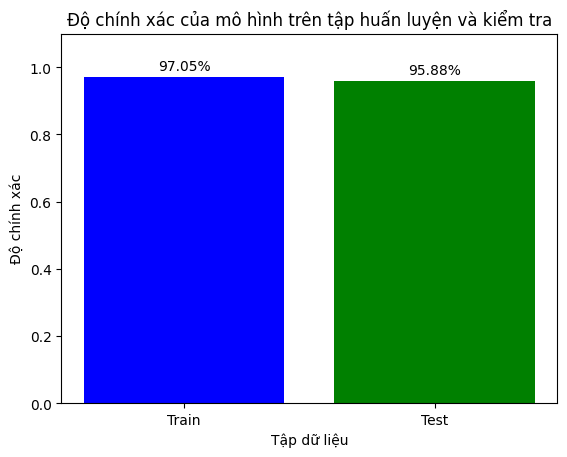

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

labels = ['Train', 'Test']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc*100:.2f}%', ha='center', fontsize=10)

plt.xlabel('Tập dữ liệu')
plt.ylabel('Độ chính xác')
plt.title('Độ chính xác của mô hình trên tập huấn luyện và kiểm tra')
plt.ylim([0, 1.1])  
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder
import json
from model import embeddings_model
df["embedding"] = df['vector_embeddings'].apply(
    lambda x: np.array(json.loads(x)))
encoder = LabelEncoder()
df["label_encoded"] = encoder.fit_transform(df["tag"])
X = np.vstack(df["embedding"].values)  # Vector embedding
y = df["label_encoded"].values         # Nhãn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán
new_query = "học phí ngành công nghệ thông tin"
new_query = processing_text_for_query(new_query)

new_embedding = embeddings_model(new_query)
predicted_label = model.predict(new_embedding)
predicted_label_string = encoder.inverse_transform(predicted_label)
print(f"Dự đoán nhãn: {predicted_label_string[0]}")

Dự đoán nhãn: học phí


In [27]:
from sklearn.metrics import classification_report
# Dự đoán trên tập kiểm tra
y_train_pred = model.predict(X_train)

labels = list(range(len(encoder.classes_)))  
report = classification_report(y_train, y_train_pred, target_names=encoder.classes_,labels=labels)
print("Bảng đánh giá hiệu suất mô hình trên tập train:")
print(report)


Bảng đánh giá hiệu suất mô hình trên tập train:
               precision    recall  f1-score   support

     chào hỏi       1.00      1.00      1.00         3
     học bổng       1.00      1.00      1.00         8
      học phí       1.00      1.00      1.00        56
     học viện       0.99      1.00      0.99       175
ngành đào tạo       1.00      1.00      1.00       399
   tuyển sinh       1.00      0.95      0.97        40
         điểm       1.00      1.00      1.00       398
      địa chỉ       1.00      1.00      1.00         7

     accuracy                           1.00      1086
    macro avg       1.00      0.99      1.00      1086
 weighted avg       1.00      1.00      1.00      1086



In [28]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test)

labels = list(range(len(encoder.classes_)))  
report = classification_report(y_test, y_test_pred, target_names=encoder.classes_, labels=labels)
print(report)

               precision    recall  f1-score   support

     chào hỏi       1.00      0.50      0.67         2
     học bổng       0.00      0.00      0.00         0
      học phí       0.95      0.90      0.92        20
     học viện       0.91      0.93      0.92        46
ngành đào tạo       1.00      1.00      1.00        97
   tuyển sinh       0.60      0.75      0.67         4
         điểm       1.00      1.00      1.00       100
      địa chỉ       1.00      1.00      1.00         3

    micro avg       0.97      0.97      0.97       272
    macro avg       0.81      0.76      0.77       272
 weighted avg       0.98      0.97      0.97       272



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [29]:
import joblib
# Lưu mô hình Logistic Regression
joblib.dump(model, "test_model/logistic_regression_model.pkl")
print("Mô hình đã được lưu thành công!")
joblib.dump(encoder, "test_model/label_encoder.pkl")
print("Encoder đã được lưu thành công!")


Mô hình đã được lưu thành công!
Encoder đã được lưu thành công!


In [30]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Tính độ chính xác
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Độ chính xác trên tập huấn luyện: {train_accuracy:.2%}")
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy:.2%}")


Độ chính xác trên tập huấn luyện: 99.82%
Độ chính xác trên tập kiểm tra: 97.43%


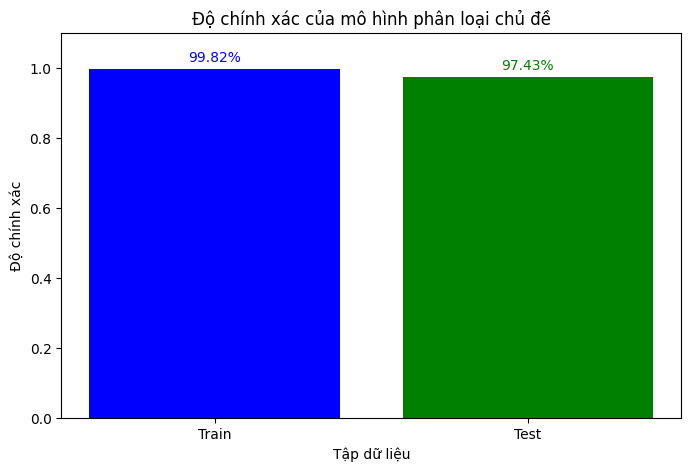

In [31]:
# Dữ liệu để trực quan hóa
data = {'Data': ['Train', 'Test'],
        'Accuracy': [train_accuracy, test_accuracy]}

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(data['Data'], data['Accuracy'], color=['blue', 'green'])
plt.ylim(0, 1.1)
plt.title("Độ chính xác của mô hình phân loại chủ đề")
plt.ylabel("Độ chính xác")
plt.xlabel("Tập dữ liệu")
plt.text(0, train_accuracy + 0.02, f"{train_accuracy:.2%}", ha='center', color='blue')
plt.text(1, test_accuracy + 0.02, f"{test_accuracy:.2%}", ha='center', color='green')
plt.show()


In [32]:
import joblib
# Tải lại mô hình
loaded_model = joblib.load("test_model/logistic_regression_model.pkl")
print("Mô hình đã được tải thành công!")

# Tải lại encoder
loaded_encoder = joblib.load("test_model/label_encoder.pkl")
print("Encoder đã được tải thành công!")


Mô hình đã được tải thành công!
Encoder đã được tải thành công!


In [33]:
from preprocess import processing_text_for_query
from model import embeddings_model
new_query = "Học viện có bao nhiêu loại học bổng?"
new_query = processing_text_for_query(new_query)
new_embedding = embeddings_model(new_query)

# Sử dụng mô hình đã tải để dự đoán
predicted_label = loaded_model.predict(new_embedding)
predicted_label_string = loaded_encoder.inverse_transform(predicted_label)
print(f"Dự đoán nhãn: {predicted_label_string[0]}")


Dự đoán nhãn: học bổng
